In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats import weightstats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBRegressor
import pickle
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize']=11,6

import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')


# Loading Data Set

In [4]:
try:
    df = pd.read_csv('kc_house_data.csv')
except BaseException as error:
    print(f'Error mesage is:{error}')
    
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
#function to determine the input and the target
X = df.drop(columns=['price','id', 'date', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'zipcode', 'condition','yr_built', 'sqft_lot', 'floors', 'waterfront', 'yr_renovated'], axis= 1)
y = df['price']

In [7]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [9]:
train_data = X_train.join(y_train)

array([[<AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'sqft_living'}>],
       [<AxesSubplot: title={'center': 'view'}>,
        <AxesSubplot: title={'center': 'grade'}>,
        <AxesSubplot: title={'center': 'sqft_basement'}>],
       [<AxesSubplot: title={'center': 'lat'}>,
        <AxesSubplot: title={'center': 'long'}>,
        <AxesSubplot: title={'center': 'price'}>]], dtype=object)

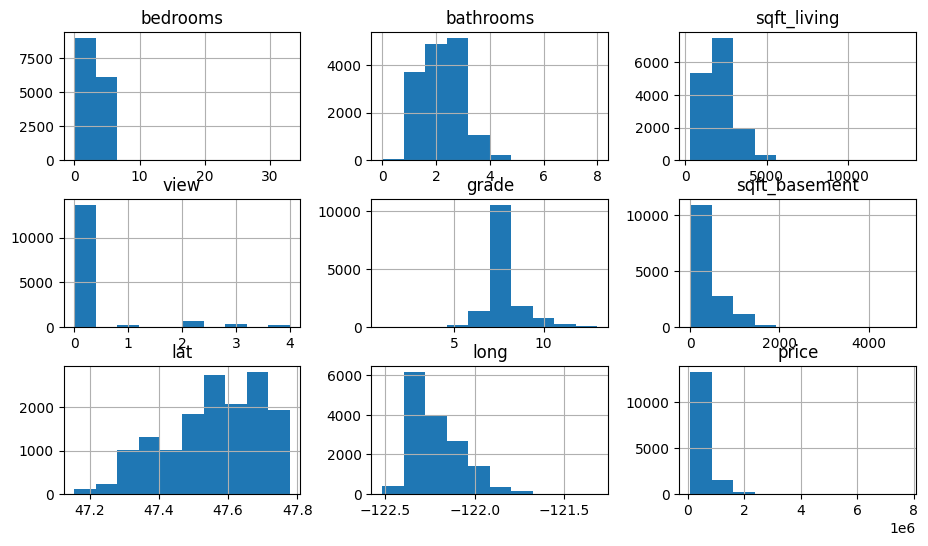

In [10]:
train_data.hist()

# Data Preprocessing

# General function training code

In [11]:
def traning_model(mod,X_train,X_test, y_train, y_test):
    mod.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    print(f"The training data score= {round(mod.score(X_train,y_train), 3)}")
    print(f"The testing data score= {round(mod.score(X_test,y_test), 3)}")
    print("The mean absolute error= ",mean_absolute_error(y_test,y_pred))
    return mod.score(X_test,y_test)

# Random Forest Model

In [18]:
# function to choose the best parameters for the Random Forest Model
def CV_RandomForest(x_train, y_train):
    params = {'n_estimators':np.arange(100,250,30),'max_depth':np.arange(5,15),'min_samples_leaf':np.arange(1,10)}
    rf=RandomForestRegressor()
    cv2 = RandomizedSearchCV(rf,params,cv=4,n_iter=25)
    cv2.fit(x_train, y_train)
    return cv2.best_params_

In [19]:
# choose the best parameters to use for this model
RF_best_params=CV_RandomForest(X_train, y_train)
print("the best parameters to use for this model",RF_best_params)

the best parameters to use for this model {'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': 13}


In [20]:
rf=RandomForestRegressor(n_estimators=220,min_samples_leaf=2,max_depth=13)
trainM = traning_model(rf,X_train,X_test, y_train, y_test)
print(f"the bset scor is: {round(trainM, 3)}")


The training data score= 0.952
The testing data score= 0.855
The mean absolute error=  75121.66774748596
the bset scor is: 0.855


## DecisionTree Model

In [15]:
# function to choose the best parameters for the Decision Tree Model
def CVDecisionTree(x_train, y_train):
    params = {'splitter':["best", "random"],'max_depth':np.arange(5,30),'min_samples_leaf':np.arange(1,20)}
    dt=DecisionTreeRegressor()
    cv2 = RandomizedSearchCV(dt,params,cv=4,n_iter=25)
    cv2.fit(x_train, y_train)
    return cv2.best_params_

In [16]:
# choose the best parameters to use for this model
DT_best_params=CVDecisionTree(X_train, y_train)
print("the best parameters to use for this model",DT_best_params)

the best parameters to use for this model {'splitter': 'best', 'min_samples_leaf': 9, 'max_depth': 18}


In [17]:
dt=DecisionTreeRegressor(splitter='best', min_samples_leaf=6, max_depth=27)
trainM = traning_model(dt,X_train,X_test, y_train, y_test)
print(f"the bset scor is: {round(trainM, 3)}")

The training data score= 0.915
The testing data score= 0.772
The mean absolute error=  91964.37926013127
the bset scor is: 0.772


# XGBoost Model

In [12]:
# function to choose the best parameters for the XGBoost Model
def CVXGBoost(x_train, y_train):
    params = {'n_estimators':np.arange(100,250,30),'max_depth':np.arange(5,15),'max_leaves':np.arange(1,10)}
    xg=XGBRegressor()
    cv2 = RandomizedSearchCV(xg,params,cv=4,n_iter=25)
    cv2.fit(x_train, y_train)
    return cv2.best_params_

In [13]:
# choose the best parameters to use for this model
XG_best_params=CVXGBoost(X_train, y_train)
print(XG_best_params)

{'n_estimators': 100, 'max_leaves': 9, 'max_depth': 6}


In [14]:
xg=XGBRegressor(n_estimators=100,max_leaves=8,max_depth=6) 
trainM = traning_model(xg,X_train,X_test, y_train, y_test)
print(f"the bset scor is: {trainM}")


The training data score= 0.964
The testing data score= 0.871
The mean absolute error=  73785.16826334535
the bset scor is: 0.8714651186789778


# Linear Regression Model

In [202]:
Reg=LinearRegression()
trainM = traning_model(Reg,X_train,X_test, y_train, y_test)
print(f"the bset scor is: {trainM}")

The training data score= 0.643
The testing data score= 0.66
The mean absolute error=  133963.18428304003
the bset scor is: 0.6598420378257093


# The best Model

In [203]:
scors = {
    'RandomForest': rf.score(X_test,y_test),
    'DecisionTree': dt.score(X_test,y_test),
    'XGBoost': xg.score(X_test,y_test),
    'LinerRegrition': Reg.score(X_test,y_test)
}

In [204]:
scors

{'RandomForest': 0.8514941372118358,
 'DecisionTree': 0.7770659668225138,
 'XGBoost': 0.8733402873749805,
 'LinerRegrition': 0.6598420378257093}

In [205]:
# find bist model scor
max_vn = max(scors)

In [206]:
# find bist model scor value
max_v = max(scors.values())

In [207]:
print(f"the {max_vn} is maximum score: {max_v}")


the XGBoost is maximum score: 0.8733402873749805


In [208]:
#pikle the model file
with open('XGBoost', 'wb') as file:
    pickle.dump(xg, file)